## (Python 3) Bootstrapping : an Alternative to T TEST : Difference between two Means 

1. T test has assumptions involved. You must be carefull. 
2. While in bootstrap, just do bootstrap. Don't assume. Just do it !

In this video , I will show you the results of T-test using BOotstrap . WIth this, you can , with confidence say that the difference between statistics (mean in this case) is really that Significant

In [1]:
from scipy import stats as stat
from sklearn import datasets
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
iris_data = datasets.load_iris()

In [3]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
mydata = pd.DataFrame(data = iris_data.data, columns = iris_data.feature_names)

In [5]:
mydata['target'] = iris_data.target

In [6]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
mydata.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
mydata.shape

(150, 5)

In [8]:
dataPortion = mydata[['sepal length (cm)', 'target']]

## NULL Hypothesis:
### There is no difference between the  sepal length of versicolor (target 1) to  that of virginica (target 2)

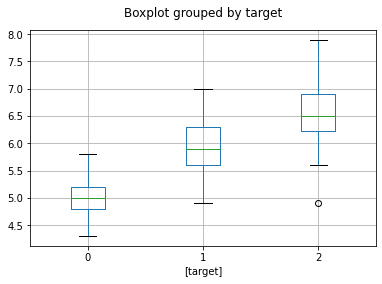

In [9]:
dataPortion.boxplot(by = 'target')
plt.title("")
plt.show()

In [10]:
#versicolor sepal length:
sepal_versicolor = dataPortion.loc[dataPortion['target'] == 1]['sepal length (cm)']
#virginica sepal length
sepal_virginica = dataPortion.loc[dataPortion['target'] == 2]['sepal length (cm)']


In [28]:
sepal_virginica.head(4)

100    6.3
101    5.8
102    7.1
103    6.3
Name: sepal length (cm), dtype: float64

In [11]:
m = stat.ttest_ind(sepal_virginica, sepal_versicolor , equal_var = True)
print(m)
print(m[1]/2)

Ttest_indResult(statistic=5.629165259719801, pvalue=1.7248563024547942e-07)
8.624281512273971e-08


## Bootstrapping

In [12]:
def boot_strap_mean(mydata):
    shape = mydata.shape[0]
    mydata = mydata.values.reshape(-1)
    result = np.random.choice(mydata,size = shape, replace = True)
    return np.mean(result)

In [13]:

def plot_fig(data1,data2):
    
    fig , ax = plt.subplots(ncols = 2, figsize = (15, 8))
    ax[0].boxplot(data1)

    ax[1].boxplot(data2)

    plt.show()
    


In [14]:
def main_boot(data1, data2):
    difference = []
    for i in range(2000):
        difference.append(boot_strap_mean(data1) - boot_strap_mean(data2))
    plt.hist(difference, bins = 50)
    plt.axvline(x = 0, color = 'r')
    plt.show()
    
    print("min", np.min(difference))
    print("max", np.max(difference))
    difference = np.array(difference)
    
    
    return difference
    
    

## Ttest and BOotstrap Part 1 : extremene statistically significant difference in mean

In [15]:
m = stat.ttest_ind(sepal_virginica, sepal_versicolor, equal_var = True)
print(m)
print(m[1]/2)

Ttest_indResult(statistic=5.629165259719801, pvalue=1.7248563024547942e-07)
8.624281512273971e-08


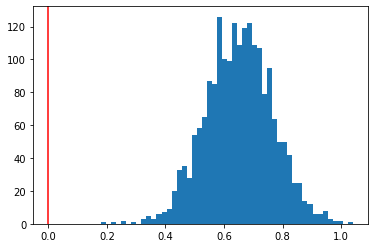

min 0.1800000000000006
max 1.04


In [16]:
newdf = main_boot(sepal_virginica, sepal_versicolor)

In [17]:
np.sum(newdf<=0)/newdf.shape[0]

0.0

# Ttest & Bootstrap part 2 : stistically NOT significant

What if I add 0.5 cm on sepal_versicolor and see the result of the t test?

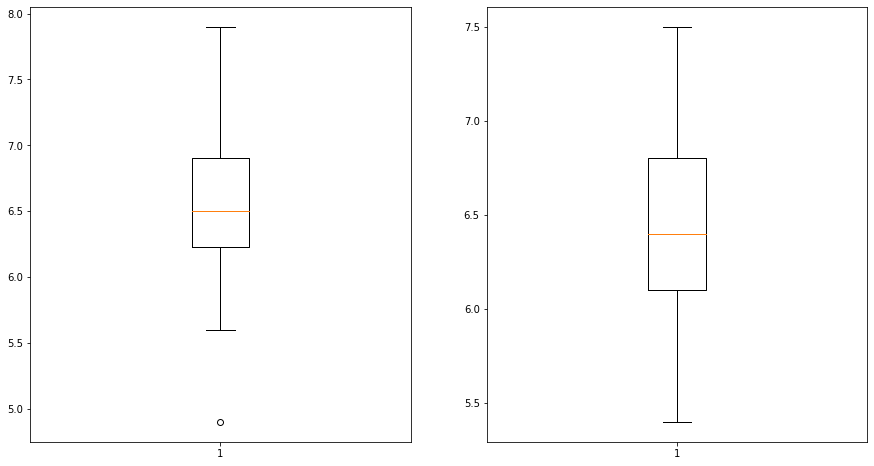

In [18]:
plot_fig(sepal_virginica, sepal_versicolor+.5)

In [19]:
m = stat.ttest_ind(sepal_virginica, sepal_versicolor +.5 ,equal_var = True)
print(m)
print(m[1]/2)

Ttest_indResult(statistic=1.3123207353947894, pvalue=0.19247731461620893)
0.09623865730810446


In [20]:
#The difference is not statisically significant since t statistic is 1.31 or p value > .05

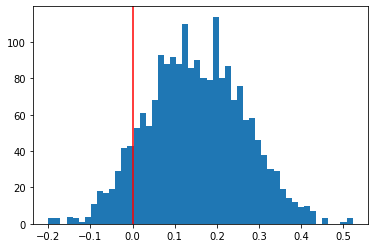

min -0.20000000000000195
max 0.5219999999999976


In [21]:
newdf = main_boot(sepal_virginica , sepal_versicolor +.5)

In [22]:
np.sum(newdf<=0)/newdf.shape[0]

0.0935

# Ttest & Bootstrap part 3 : Borderline ??? Murky 

What if I add 0.4 cm on sepal_versicolor and see the result of the t test?

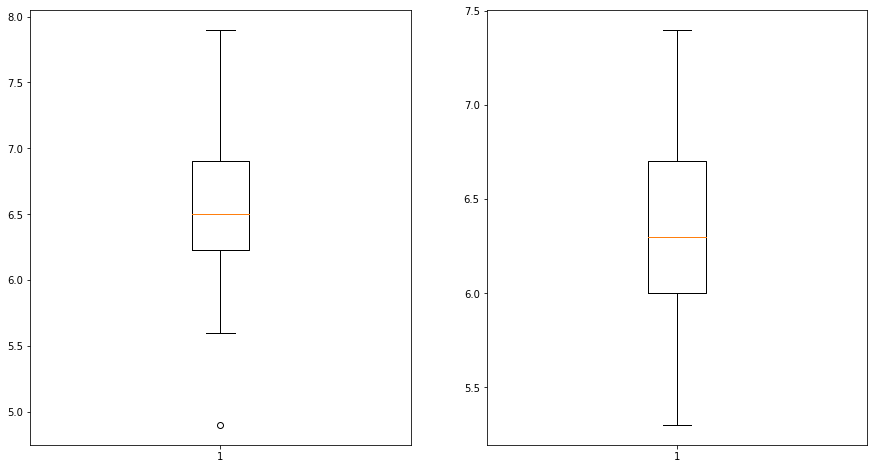

In [23]:
plot_fig(sepal_virginica, sepal_versicolor+.4)

In [24]:
m = stat.ttest_ind(sepal_virginica, sepal_versicolor +.4 ,equal_var = True)
print(m)
print(m[1]/2)

Ttest_indResult(statistic=2.1756896402597885, pvalue=0.03198271764983915)
0.015991358824919574


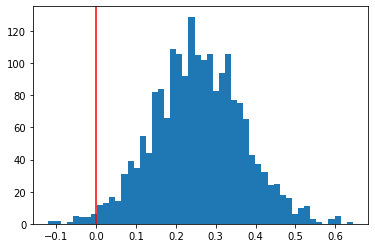

min -0.11999999999999833
max 0.6439999999999984


In [25]:
newdf = main_boot(sepal_virginica, sepal_versicolor +.4)

In [26]:
np.sum(newdf<=0)/newdf.shape[0]

0.011